In [1]:
import requests
import cv2
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline

device = torch.device("cuda:0")

/datalake/WMLA/installation/W_Anaconda4Sigs/ana-1401-00217454/anaconda/envs/gai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_id_or_path = "runwayml/stable-diffusion-v1-5"
model_id_or_path = r"/datalake/homes/u_1401_00217454_x/.cache/torch/hub/checkpoints/genai/stable-diffusion-2-base"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)

Loading pipeline components...: 100%|█████████████| 6/6 [00:01<00:00,  3.50it/s]


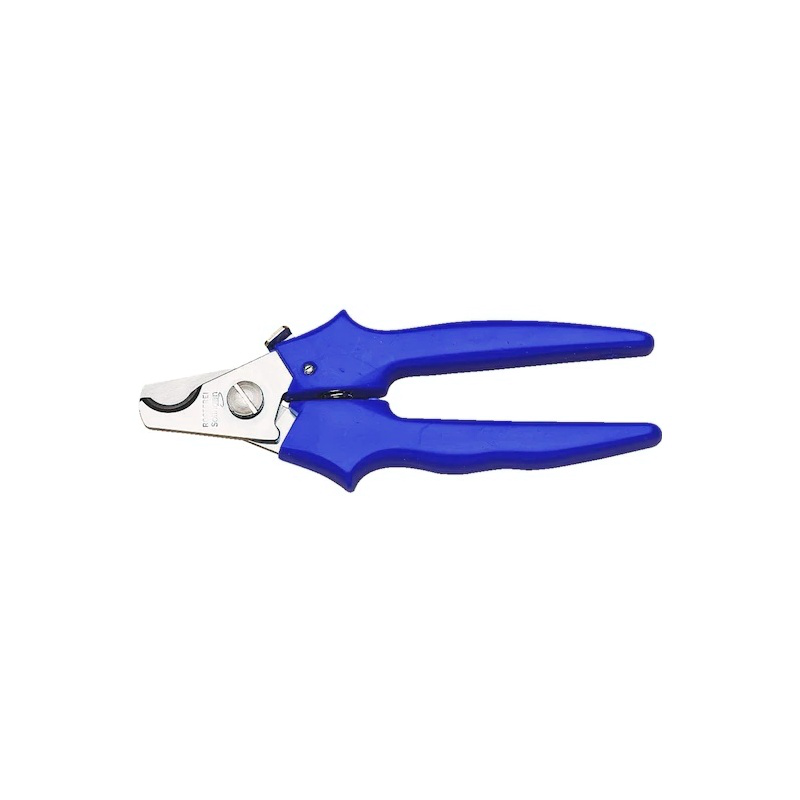

In [12]:
pipe = pipe.to("cuda:2")

image_path = r"/datalake/WMLA/data/d_1401/projects/d_00217454/code/dev/gen_ai_vision_lab/data_preparation/to_use/6020021201_0.jpg"
init_image = cv2.imread(image_path)

init_image = Image.fromarray(init_image)
init_image

In [ ]:
prompt = "Image of plier over wooden surface table in the background"
images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images
images[0].save("fantasy_landscape.png")
images[0]

In [468]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

In [469]:
model_id_or_path = r"/datalake/homes/u_1401_00217454_x/.cache/torch/hub/checkpoints/genai/stable-diffusion-2-1-base"
pipeline = AutoPipelineForInpainting.from_pretrained(
    model_id_or_path, torch_dtype=torch.float16, variant="fp16")

Loading pipeline components...: 100%|█████████████| 6/6 [00:01<00:00,  3.91it/s]


In [471]:
pipeline = pipeline.to("cuda:0")

In [472]:
#pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
#pipeline.enable_xformers_memory_efficient_attention()

generator = torch.Generator("cuda:0").manual_seed(92)
prompt = "wooden surface table, fine texture, realistic"

In [473]:
# load base and mask image
init_image = load_image("/datalake/WMLA/data/d_1401/projects/d_00217454/code/dev/gen_ai_vision_lab/data_preparation/to_use/images/6022020103_180_image.jpg")
mask_image = load_image("/datalake/WMLA/data/d_1401/projects/d_00217454/code/dev/gen_ai_vision_lab/data_preparation/to_use/masks/6022020103_180.jpg")

In [ ]:
prompt = "wooden surface, perfect mask, 2D, smooth corners"
negative_prompt = "bad quality, contrast, poor corners"
image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
image.save("g66.png")
make_image_grid([init_image, image], rows=1, cols=2)

In [460]:
pwd

'/datalake/homes/u_1401_00217454_x'

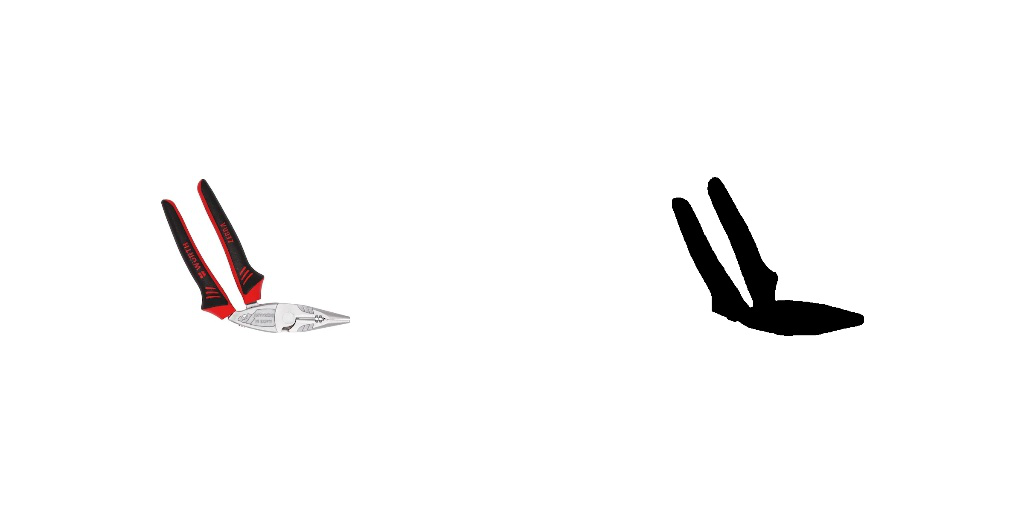

In [435]:
make_image_grid([init_image, mask_image], rows=1, cols=2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [240]:
np.array(mask_image).shape, np.array(init_image).shape

((512, 512, 3), (1200, 1200, 3))

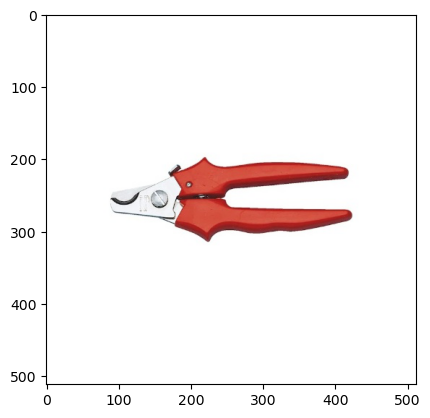

In [130]:
plt.imshow(init_image)

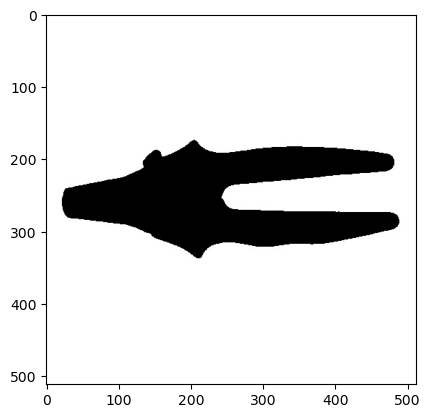

In [131]:
plt.imshow(mask_image)

In [ ]:
plt.imshow(mask_image)